#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Load the wine dataset by using sklearn

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
df = pd.DataFrame(wine.data, columns= wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
df['Target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df['Target'].value_counts()

1    71
0    59
2    48
Name: Target, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

<AxesSubplot:xlabel='Target', ylabel='count'>

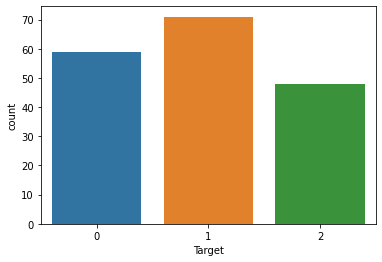

In [10]:
sns.countplot(x= 'Target', data= df)

<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>

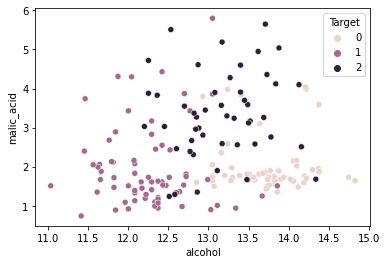

In [11]:
sns.scatterplot(x= 'alcohol', y= 'malic_acid', hue= 'Target', data= df)

#### Model

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier()

In [14]:
x = df.drop('Target', axis= 1)
y = df['Target']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [16]:
tree.fit(x_train, y_train)
pred = tree.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, pred))

[[18  1  0]
 [ 0 21  0]
 [ 1  0 13]]


In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



#### Randomized searchCV

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
from scipy.stats import randint

In [35]:
params= {'max_depth': [None, 3],
         'max_features': randint(1, 9)}

In [36]:
tree_cv = RandomizedSearchCV(DecisionTreeClassifier(), params, cv= 5)

In [41]:
tree_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [None, 3],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000168A7D26AC0>})

In [42]:
print(tree_cv.best_params_)

{'max_depth': 3, 'max_features': 7}


In [43]:
print(tree_cv.best_score_)

0.9193333333333333


In [40]:
score = tree_cv.score(x_test, y_test)
print(score)

0.9814814814814815
